

{% include toc title="In This Lesson" icon="file-text" %}



<div class='notice--success' markdown="1">



## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives



After completing this tutorial, you will be able to:



* Be able to describe the characteristics of 3 key vector data structures: points, lines and polygons.

* Be able to open a shapefile in R using `readOGR()`.

* Be able to view the metadata of a vector spatial layer in R including CRS

* Be able to access the tabular (`data.frame`) attributes of a vector spatial layer in `R`.



## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need



You will need a computer with internet access to complete this lesson and the data for week 5 of the course.



[<i class="fa fa-download" aria-hidden="true"></i> Download Week 5 Data (~500 MB)](https://ndownloader.figshare.com/files/7525363){:data-proofer-ignore='' .btn }



</div>



## About Vector Data

Vector data are composed of discrete geometric locations (x,y values) known as **vertices** that define the "shape" of the spatial object. The organization of the vertices, determines the type of vector that we are working 
with: point, line or polygon.



<figure>
    <a href="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/pnt_line_poly.png">
    <img src="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/pnt_line_poly.png" alt="points lines and polygons graphic."></a>
    <figcaption> There are 3 types of vector objects: points, lines or polygons. Each object type has a different structure. Image Source: Colin Williams (NEON)
    </figcaption>
</figure>



* **Points:** Each individual point is defined by a single x, y coordinate. There can be many points in a vector point file. Examples of point data include: sampling locations, the location of individual trees or the location of plots.

* **Lines:** Lines are composed of many (at least 2) vertices, or points, that are connected. For instance, a road or a stream may be represented by a line. This line is composed of a series of segments, each "bend" in the road or stream represents a vertex that has defined `x, y` location.

* **Polygons:** A polygon consists of 3 or more vertices that are connected and "closed". Thus the outlines of plot boundaries, lakes, oceans, and states or countries are often represented by polygons. Occasionally, a polygon can have a hole in the middle of it (like a doughnut), this is something to be aware of but not an issue we will deal with in this tutorial.


<i class="fa fa-star"></i> **Data Tip:** Sometimes, boundary layers such as states and countries, are stored as lines rather than polygons. However, these boundaries, when represented as a line, will not create a closed object with a defined "area" that can be "filled".
{: .notice}



## Shapefiles: Points, Lines, and Polygons

Geospatial data in vector format are often stored in a `shapefile` format. Because the structure of points, lines, and polygons are different, each individual shapefile can only contain one vector type (all points, all lines 
or all polygons). You will not find a mixture of point, line and polygon objects in a single shapefile.

Objects stored in a shapefile often have a set of associated `attributes` that describe the data. For example, a line shapefile that contains the locations of streams, might contain the associated stream name, stream "order" and other 
information about each stream line object.



* More about shapefiles can found on <a href="https://en.wikipedia.org/wiki/Shapefile" target="_blank">Wikipedia</a>.



## Import Shapefiles


We will use the `geopandas` library to work with vector data in `R`. We will also use `matplotlib.pyplot` to plot our data and `folium`. 



In [11]:
## Note not sure what folium does... 
## had to install it via pip rather than conda... 
## will need some discussion on using pip vs conda...

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
# import folium
import os.path as op
# is there any reason to not just import os 
import os
# what does this do?
plt.ion()

In [13]:
# os.getcwd()
# be sure to set your working directory
os.chdir("/Users/lewa8222/Documents/earth-analytics")

#print os.getcwd();


The shapefiles that we will import are:

* A polygon shapefile representing our field site boundary,
* A line shapefile representing roads, and
* A point shapefile representing the location of field sites at the <a href="http://www.neonscience.org/science-design/field-sites/harvard-forest" target="_blank"> San Joachin field site</a>.

The first shapefile that we will open contains the point locations of plots where trees have been measured. To import shapefiles we use the `geopandas` function `read_file()`. Notice that we call the `read_file()` function using `gpd.read_file()` to tell python to look for the function within the `geopandas` library.


In [14]:
# path_data = '../../../../../../../data/week05/'

sjer_plot_locations = gpd.read_file(filename="data/week5/california/SJER/vector_data/SJER_plot_centroids.shp")
sjer_plot_locations

,Plot_ID,Point,easting,geometry,northing,plot_type
0,SJER1068,center,255852.376,POINT (255852.376 4111567.818),4111567.818,trees
1,SJER112,center,257406.967,POINT (257406.967 4111298.971),4111298.971,trees
2,SJER116,center,256838.760,POINT (256838.76 4110819.876),4110819.876,grass
3,SJER117,center,256176.947,POINT (256176.947 4108752.026),4108752.026,trees
4,SJER120,center,255968.372,POINT (255968.372 4110476.079),4110476.079,grass
5,SJER128,center,257078.867,POINT (257078.867 4111388.57),4111388.570,trees
6,SJER192,center,256683.434,POINT (256683.434 4111071.087),4111071.087,grass
7,SJER272,center,256717.467,POINT (256717.467 4112167.778),4112167.778,trees
8,SJER2796,center,256034.390,POINT (256034.39 4111533.879),4111533.879,soil
9,SJER3239,center,258497.102,POINT (258497.102 4109856.983),4109856.983,soil



<i class="fa fa-star"></i> **Data Tip:** The acronym, OGR, refers to the OpenGIS Simple Features Reference Implementation. <a href="https://trac.osgeo.org/gdal/wiki/FAQGeneral" target="_blank"> Learn more about OGR.</a>
{: .notice}


## Shapefile Metadata & Attributes

When we import the `SJER_plot_centroids` shapefile layer into `Python` the `gpd.read_file()` function automatically stores information about the data. We are particularly interested in the geospatial **metadata**, describing the format, `CRS`, `extent`, and other components of the vector data, and the **attributes** which describe properties associated with each individual vector object.


## Spatial Metadata

Key metadata for all shapefiles include:

1. **Object Type:** the class of the imported object.
2. **Coordinate Reference System (CRS):** the projection of the data.
3. **Extent:** the spatial extent (geographic area that the shapefile covers) of the shapefile. Note that the spatial extent for a shapefile represents the extent for ALL spatial objects in the shapefile.

We can view shapefile metadata using the `class`, `crs` and `extent` methods:


In [19]:
# don't understand what this is doing
getattr(sjer_plot_locations.head(), attr)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [21]:
# ```{r view-metadata }
# view just the class for the shapefile
# class(sjer_plot_locations)
# view just the crs for the shapefile
# crs(sjer_plot_locations)
# view just the extent for the shapefile
# extent(sjer_plot_locations)
# view all metadata at same time
# sjer_plot_locations
# ```

# not exactly sure why we are looping through here
#for attr in ['area', 'crs', 'bounds', 'length']:
#    print(attr, '\n', getattr(sjer_plot_locations.head(), attr), '\n---\n')

# why are we grabbing area?? 
# how do we get the spatial extent of the object - which should be a total of 4 numbers? 

# view the crs or coordinate reference system of the data
print(sjer_plot_locations.crs)


{'init': 'epsg:32611'}


The CRS for our data is epsg code: 32611. We will discuss CRS' in a later lesson but for now a quick google search reveals that this CRS is: UTM zone 11 North - WGS84 

http://spatialreference.org/ref/epsg/wgs-84-utm-zone-11n/


In [27]:
# not sure what these bounds are if these are points - maybe one per plot but we want the extent
# also note we dno't need print in the notebooks but maybe in the console?? it's always nice to simplify... what is the best approach?
print(sjer_plot_locations.bounds)


          minx         miny        maxx         maxy
0   255852.376  4111567.818  255852.376  4111567.818
1   257406.967  4111298.971  257406.967  4111298.971
2   256838.760  4110819.876  256838.760  4110819.876
3   256176.947  4108752.026  256176.947  4108752.026
4   255968.372  4110476.079  255968.372  4110476.079
5   257078.867  4111388.570  257078.867  4111388.570
6   256683.434  4111071.087  256683.434  4111071.087
7   256717.467  4112167.778  256717.467  4112167.778
8   256034.390  4111533.879  256034.390  4111533.879
9   258497.102  4109856.983  258497.102  4109856.983
10  258277.829  4110161.674  258277.829  4110161.674
11  256961.794  4107527.074  256961.794  4107527.074
12  256148.197  4107578.841  256148.197  4107578.841
13  257228.336  4109767.289  257228.336  4109767.289
14  254738.618  4110249.265  254738.618  4110249.265
15  256185.584  4110047.586  256185.584  4110047.586
16  257460.486  4109616.679  257460.486  4109616.679
17  255871.194  4110759.039  255871.194  41107

0     ()
1     ()
2     ()
3     ()
4     ()
5     ()
6     ()
7     ()
8     ()
9     ()
10    ()
11    ()
12    ()
13    ()
14    ()
15    ()
16    ()
17    ()
dtype: object

In [30]:
# don't think we need this either!
# print(sjer_plot_locations.length)
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

We can view the type of object that we are working with using the `type()` function. Here we can see that our `sjer_plot_locations` object is a `geopandas geodataframe`. The CRS **UTM zone 18N**. The CRS is critical to interpreting the object `extent` values as it specifies units.


<figure>
    <a href="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/spatial_extent.png">
    <img src="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/spatial_extent.png" alt="the spatial extent represents the spatial area that a particular dataset covers."></a>
    <figcaption>The spatial extent of a shapefile or R spatial object represents
    the geographic "edge" or location that is the furthest north, south east and
    west. Thus is represents the overall geographic coverage of the spatial object.
    Image Source: National Ecological Observatory Network (NEON)
    </figcaption>
</figure>



## Spatial Data Attributes

Each object in a shapefile has one or more attributes associated with it.
Shapefile attributes are similar to fields or columns in a spreadsheet. Each row
in the spreadsheet has a set of columns associated with it that describe the row
element. In the case of a shapefile, each row represents a spatial object - for
example, a road, represented as a line in a line shapefile, will have one "row"
of attributes associated with it. These attributes can include different types
of information that describe objects stored within a shapefile. Thus, our road,
may have a name, length, number of lanes, speed limit, type of road and other
attributes stored with it.



<figure>

    <a href="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/attribute_table.png">
    <img src="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/attribute_table.png" alt="A shapefile has an associated attribute table. Each spatial feature in an R spatial object has the same set of
    associated attributes that describe or characterize the feature.
    Attribute data are stored in a separate *.dbf file. "></a>
    <figcaption>Each spatial feature in an R spatial object has the same set of
    associated attributes that describe or characterize the feature.
    Attribute data are stored in a separate *.dbf file. Attribute data can be
    compared to a spreadsheet. Each row in a spreadsheet represents one feature
    in the spatial object.
    Image Source: National Ecological Observatory Network (NEON)
    </figcaption>
</figure>


We view the attributes of our geopandas `GeoDataFrame` by simply typing the object name into the console
(e.g., `sjer_plot_locations`).


In [31]:
# view attribute table associated with the data
sjer_plot_locations

,Plot_ID,Point,easting,geometry,northing,plot_type
0,SJER1068,center,255852.376,POINT (255852.376 4111567.818),4111567.818,trees
1,SJER112,center,257406.967,POINT (257406.967 4111298.971),4111298.971,trees
2,SJER116,center,256838.760,POINT (256838.76 4110819.876),4110819.876,grass
3,SJER117,center,256176.947,POINT (256176.947 4108752.026),4108752.026,trees
4,SJER120,center,255968.372,POINT (255968.372 4110476.079),4110476.079,grass
5,SJER128,center,257078.867,POINT (257078.867 4111388.57),4111388.570,trees
6,SJER192,center,256683.434,POINT (256683.434 4111071.087),4111071.087,grass
7,SJER272,center,256717.467,POINT (256717.467 4112167.778),4112167.778,trees
8,SJER2796,center,256034.390,POINT (256034.39 4111533.879),4111533.879,soil
9,SJER3239,center,258497.102,POINT (258497.102 4109856.983),4109856.983,soil


In this case, we have several attributes associated with our points including:

* Plot_ID, Point, easting, geometry, northing, plot_type 


## Metadata & Attribute Summary

We can view a metadata & attribute summary of each shapefile by entering
the name of the `R` object in the console. Note that the metadata output
includes the **class**, the number of **features**, the **extent**, and the
**coordinate reference system** (`crs`) of the `R` object. The last two lines of
`summary` show a preview of the `R` object **attributes**.

## what's a good quick way to access all of the key spatial attributes. I'm still not sure how to get the spatial extent. Is there 


In [5]:
# view a summary of metadata & attributes associated with the spatial object
# summary(sjer_plot_locations)
# ```

#sjer_plot_locations
# this isn't quite right... can we do something along the lines of gdalinfo?? 

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.76 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.57)
6,SJER192,center,4111071.087,256683.434,grass,POINT (256683.434 4111071.087)
7,SJER272,center,4112167.778,256717.467,trees,POINT (256717.467 4112167.778)
8,SJER2796,center,4111533.879,256034.390,soil,POINT (256034.39 4111533.879)
9,SJER3239,center,4109856.983,258497.102,soil,POINT (258497.102 4109856.983)


# Plot a Shapefile

Next, let's visualize the data in our `R` `spatialpointsdataframe` object using the `.plot()` method.

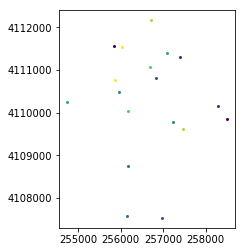

In [33]:
# quickly plot the data
sjer_plot_locations.plot()

We can adjust the symbol size of our plot using the `markersize` argument.
We can add a title using `ax.set_title()`

## How do i adjust colors?

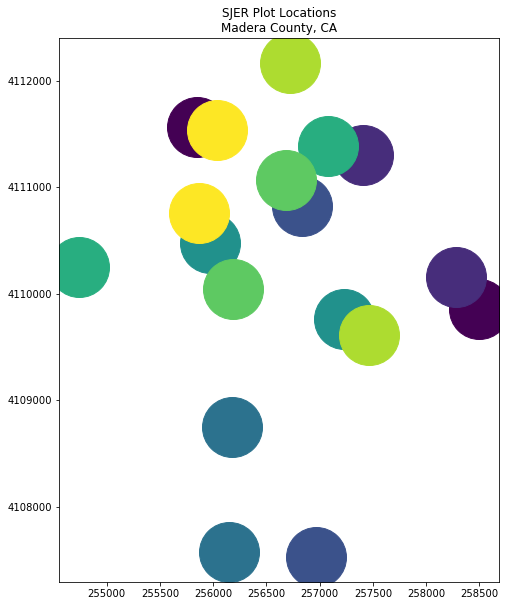

In [34]:
# Plot the data adjusting marker size and colors
# # 'col' sets point symbol color

ax = sjer_plot_locations.plot(figsize=(10, 10), markersize=60)
ax.set_title('SJER Plot Locations\nMadera County, CA')


<div class="notice--warning" markdown="1">


## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Test your knowledge: Import Line & Polygon Shapefiles

Using the steps above, import the `data/week5/california/madera-county-roads/tl_2013_06039_roads`
and `data/week5/california/SJER/vector_data/SJER_crop.shp` shapefiles into
`R`. Call the roads object `sjer_roads` and the crop layer
`sjer_crop_extent`.

Answer the following questions:

1. What type of `R` spatial object is created when you import each layer?
2. What is the `CRS` and `extent` for each object?
3. Do the files contain, points, lines or polygons?
4. How many spatial objects are in each file?
</div>


In [38]:
## NOTE that this is the answer to the challenge and thus needs to be hidden. 

# ```{r import-point-line, echo=FALSE, results="hide" }
# import line shapefile
# sjer_roads <- readOGR("data/week5/california/madera-county-roads",
#                       layer = "tl_2013_06039_roads")


# sjer_crop_extent <- readOGR("data/week5/california/SJER/vector_data/",
#                             "SJER_crop")

# 1
# class(sjer_roads)
# class(sjer_plot_locations)

# # 2
# crs(sjer_roads)
# extent(sjer_roads)
# crs(sjer_plot_locations)
# extent(sjer_plot_locations)

# 3
# #sjer_roads contains only lines and sjer_plot_locations contains only 1 point

# 4 -> numerous ways to find this; sjer_roads=13,
# length(sjer_roads)  #easiest, but not previously taught
# sjer_roads  #look at 'features'
# attributes(sjer_roads)  #found in the $data section as above

# Alternative code for 1-4: view metadata/attributes all at once
# sjer_roads
# attributes(sjer_roads)
# ```

# sjer_roads = gpd.read_file(op.join(path_data, 'california', 'madera-county-roads', 'tl_2013_06039_roads.shp'))
sjer_roads = gpd.read_file("data/week5/california/madera-county-roads/tl_2013_06039_roads.shp")
#sjer_crop_extent = gpd.read_file(op.join(path_data, 'california', 'SJER', 'vector_data', 'SJER_crop.shp'))
sjer_crop_extent = gpd.read_file("data/week5/california/SJER/vector_data/SJER_crop.shp")
print(sjer_roads.crs)
print(sjer_crop_extent.crs)

{'init': 'epsg:4269'}
{'init': 'epsg:32611'}




## Plot Multiple Shapefiles

The `plot()` function can be used to plot spatial objects. Use the following

arguments to add a title to your plot and to layer several spatial objects

on top of each other in your plot.



* `add = TRUE`: overlay a shapefile or raster on top the existing plot. This argument mimics layers in a typical GIS application like QGIS.

* `main=""`: add a title to the plot. To add a line break to your title, use `\n` where the line break should occur.




In [35]:
# ```{r plot-multiple-shapefiles, fig.cap="plot of sjer plots layered on top of the crop extent." }

# # Plot multiple shapefiles

# plot(sjer_crop_extent, col = "lightgreen",

#      main="NEON Harvard Forest\nField Site")

# plot(sjer_roads, add = TRUE)



# # Use the pch element to adjust the symbology of the points

# plot(sjer_plot_locations,

#   add  = TRUE,

#   pch = 19,

#   col = "purple")

# ```

sjer_roads = sjer_roads.to_crs(sjer_plot_locations.crs)

ax = sjer_crop_extent.plot(color='g', alpha=.5)
sjer_plot_locations.plot(ax=ax, markersize=10, color='r')


NameError: name 'sjer_roads' is not defined

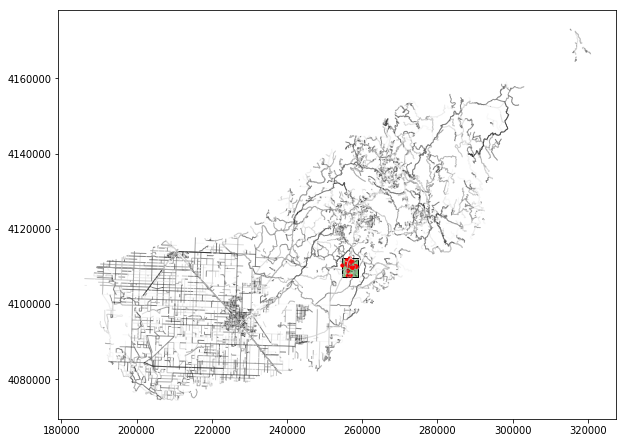

In [9]:
ax = sjer_roads.plot(cmap='Greys', alpha=.5, figsize=(10, 10))
sjer_crop_extent.plot(color='g', ax=ax, alpha=.5)
sjer_plot_locations.plot(ax=ax, markersize=10, color='r')